# Argentina stats on novel COVID-19 pandemic #

#### The following notebook is based on https://worldometers.info data and https://github.com/CSSEGISandData data. COVID-19 is currently a global pandemic affecting 158 countries and territories around the world. 
#### The objective of this notebook is to provide updated information on Argentina's COVID-19 cases comparing it to other countries of the region and the world, and provide some statistical analysis on them.

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

confirmed_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
recovered_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
death_cases     = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

Argentina data will be recovered from sources in https://es.wikipedia.org/wiki/Pandemia_de_coronavirus_de_2020_en_Argentina as it contemplates more updated data, and is more specific than other data. Other data will be used for comparison.

In [157]:
arg_confirmed_cases = pd.read_csv("argentina_covid_19_data/argentina-Confirmed.csv", encoding = "ISO-8859-1")
arg_recovered_cases = pd.read_csv("argentina_covid_19_data/argentina-Recovered.csv", encoding = "ISO-8859-1")
arg_death_cases     = pd.read_csv("argentina_covid_19_data/argentina-Deaths.csv", encoding = "ISO-8859-1")

In [158]:
arg_confirmed = arg_confirmed_cases.loc[(arg_confirmed_cases['Country/Region'] == 'Argentina') 
                & (arg_confirmed_cases['Province/State'] == 'All')]

arg_confirmed = arg_confirmed.drop(['Province/State'], axis=1)
arg_confirmed = arg_confirmed.set_index('Country/Region')

total = 0
total_list = []
for index, rows in arg_confirmed.iterrows():
    for date, cases in rows.items():
        total += cases
        total_list.append({date: total})

tot_cases = np.diag(pd.DataFrame(total_list))
arg_confirmed_ts = arg_confirmed.copy()

i = 0
for index, rows in arg_confirmed_ts.iterrows():
    print(index)
    for date, cases in rows.items():
        arg_confirmed_ts.at[index, date] = tot_cases[i]
        i += 1
    
arg_confirmed_ts

Argentina


,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
Country/Region,,,,,,,,,,,,,
Argentina,1,1,2,8,9,12,17,19,21,31,34,45,56


In [159]:
from IPython.display import Markdown

Markdown("""
Argentina's outbreak started at 03/03/2020, when the first case was confirmed in Ciudad de Buenos Aires. The current total is {total} 
""".format(total=total))


Argentina's outbreak started at 03/03/2020, when the first case was confirmed in Ciudad de Buenos Aires. The current total is 56 


## Argentina and other countries in the region

We will now compare Argentina and all latin-american countries in the region, to see the progress that the virus has made on the region

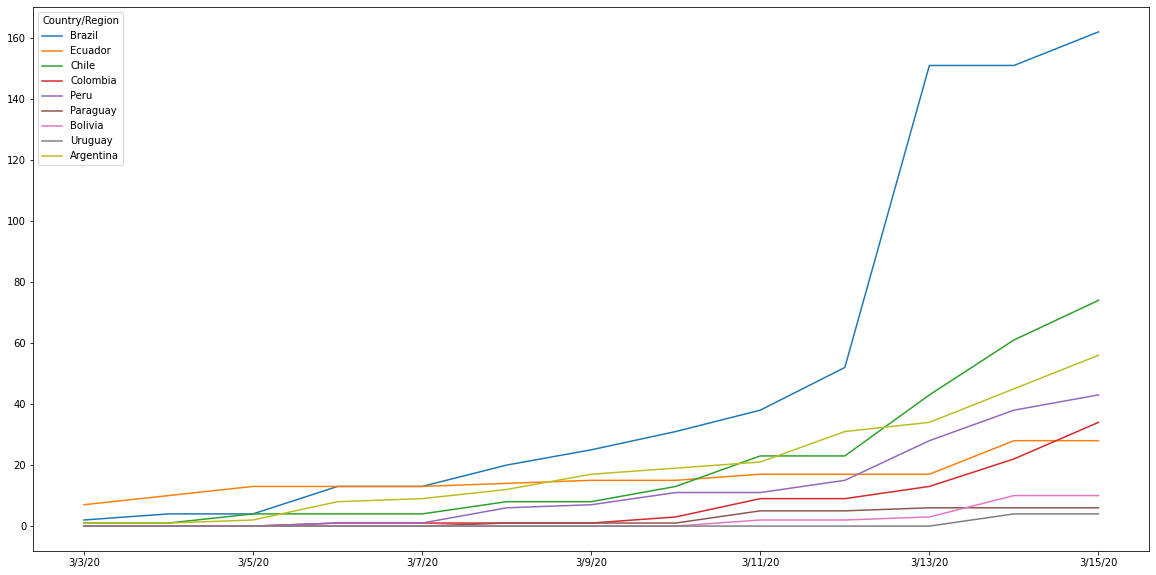

In [160]:
latam_countries = ['Brazil', 'Chile', 'Uruguay', 'Bolivia', 'Paraguay', 'Ecuador', 'Peru', 'Venezeula', 'Colombia']
latam_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(latam_countries)]

latam_confirmed_cases = latam_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis=1)
latam_confirmed_cases = latam_confirmed_cases.set_index('Country/Region')
latam_confirmed_cases = (latam_confirmed_cases.transpose()[41:]).transpose()
latam_confirmed_cases = latam_confirmed_cases.append(arg_confirmed_ts)
latam_confirmed_cases.transpose().plot(figsize=(20,10))

#### Total confirmed cases over 1M population

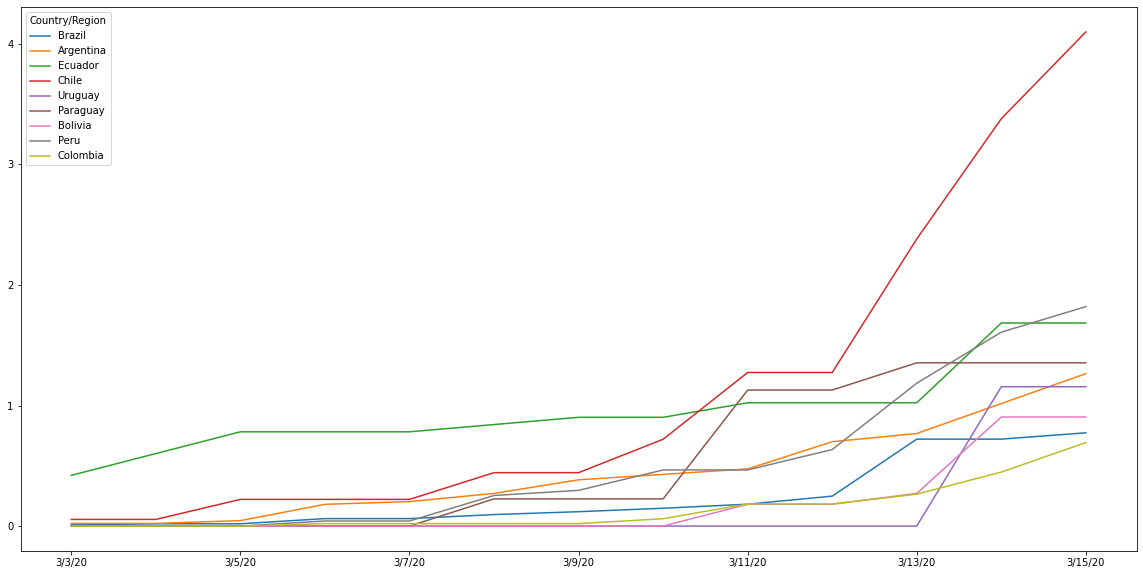

In [161]:
total_populations = {
    'Brazil': 209.3,
    'Argentina': 44.27,
    'Ecuador': 16.62,
    'Chile': 18.05,
    'Uruguay': 3.46,
    'Paraguay': 4.43,
    'Bolivia': 11.05,
    'Peru': 23.62,
    'Venezeula': 31.98,
    'Colombia': 49.07
}

latam_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations.items():
    country_cases = latam_confirmed_cases.loc[latam_confirmed_cases.index == country]
    latam_conf_cases_by_pop = latam_conf_cases_by_pop.append(country_cases.div(pop))
    
latam_conf_cases_by_pop.transpose().plot(figsize=(20,10))

In [162]:
arg_confirmed_ts

,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
Country/Region,,,,,,,,,,,,,
Argentina,1,1,2,8,9,12,17,19,21,31,34,45,56


In [169]:
# See how to do a: Linear fit, exponential fit, polynomial fit